## Al NMR Figure Generation

##### Import needed Python packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import itertools
import sys
%matplotlib inline

/home/tylerbiggs/Envs/python36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Import and examine the data

In [2]:
# import the data collected
# This data was organized on a google spreadsheet
data_path = "/home/tylerbiggs/git/pyluminate/data/al_nmr_data.csv"
# data_path = r"C:\Users\Tyler\Documents\pyluminate/data/al_nmr_data.csv"
AlNMRData = pd.read_csv(data_path)

### Derivative Column Creation

#### Aluminum to Hydroxide concentration ratio

In [3]:
AlNMRData['Al_OH_ratio'] = AlNMRData["Al_concentration"] / AlNMRData["OH_concentration"]
AlNMRData['OH_Al_ratio'] = AlNMRData["OH_concentration"] / AlNMRData["Al_concentration"]

### Examine Imported Data

In [4]:
AlNMRData.head()
# AlNMRData

,Al_concentration,OH_concentration,Al_ppm,counter_ion,temperature,Al_OH_ratio,OH_Al_ratio
0,0.005,1.0,80.45,Na+,25,0.005000,200.0
1,0.005,5.0,80.40,Na+,25,0.001000,1000.0
2,0.005,7.0,79.59,Na+,25,0.000714,1400.0
3,0.005,11.0,78.13,Na+,25,0.000455,2200.0
4,0.005,13.0,76.93,Na+,25,0.000385,2600.0


In [69]:
len(AlNMRData)

110

##### How many unique values are present in the Al_concentration column?

In [5]:
print(AlNMRData.Al_concentration.unique())
print(len(AlNMRData.Al_concentration.unique()))

[  5.00000000e-03   5.00000000e-02   1.00000000e-01   3.96000000e-01
   8.00000000e-01   1.20000000e+00   2.00000000e+00   3.00000000e+00
   5.00000000e-01   1.28000000e+00   6.00000000e+00]
11


## Create Data Subsets
Such subsets will be used later in plots to show differences in the data.

In [6]:
Na_data = AlNMRData[(AlNMRData.counter_ion == 'Na+')]
high_ppm_data = AlNMRData[(AlNMRData.Al_ppm >= 78.0)]
low_ppm_data = AlNMRData[(AlNMRData.Al_ppm <= 78.0)]

## Examine Data Distributions

### Al ppm values

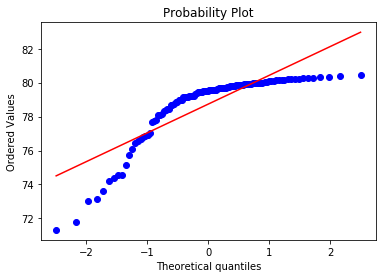

In [7]:
active_set = AlNMRData.Al_ppm

res = stats.probplot(active_set, plot=plt)
plt.show()

### [Al] Concentration

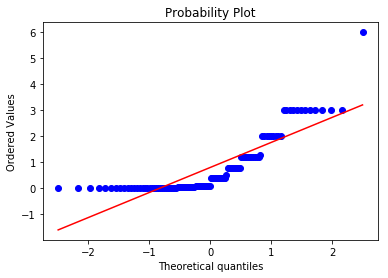

In [8]:
active_set = AlNMRData.Al_concentration

res = stats.probplot(active_set, plot=plt)
plt.show()

### [OH] Concentration

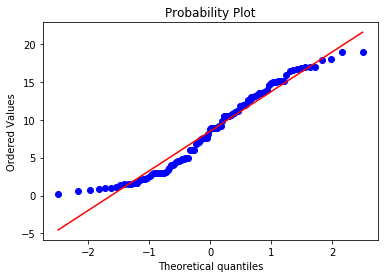

In [9]:
active_set = AlNMRData.OH_concentration

res = stats.probplot(active_set, plot=plt)
plt.show()

## Setup some plotting tools

In [10]:
# Setup a maker iterator
marker = itertools.cycle((',', '+', '.', 'o', '*', "v", '^', '>', '<', '1', '2', '3', '4'))
marker_list = [',', '+', '.', 'o', '*', "v", '^', '>', '<', '1', '2']

## Examining Outliers with Box Plots

Perhaps bin by Aluminum concentration.

/home/tylerbiggs/Envs/python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


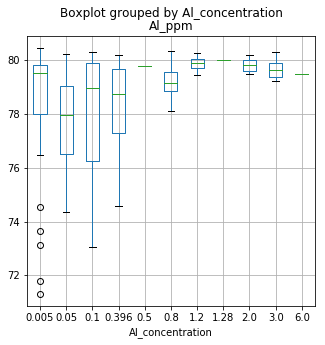

In [12]:
AlNMRData.boxplot(
    by="Al_concentration",
    column="Al_ppm",
    figsize=(5,5)
)

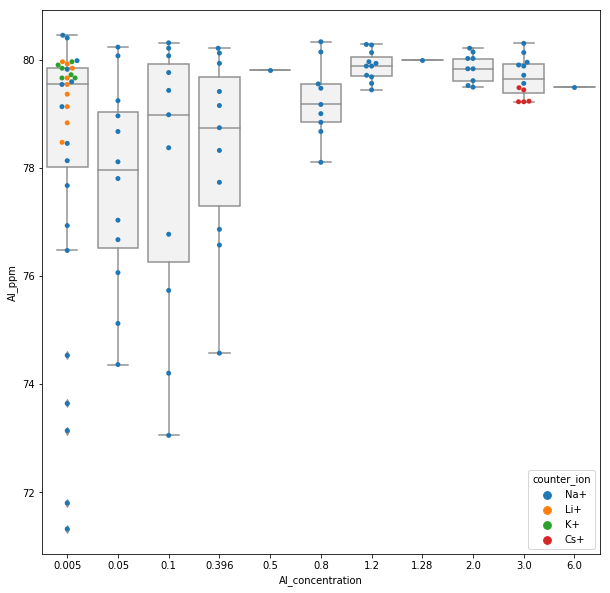

In [32]:
fig1, ax1 = plt.subplots(figsize=(10,10))

g = sns.swarmplot(
    x="Al_concentration",
    y="Al_ppm",
    hue="counter_ion",
    data=AlNMRData,
    ax=ax1,
)

g = sns.boxplot(
    x="Al_concentration",
    y="Al_ppm",
    color="0.95",
    data=AlNMRData)

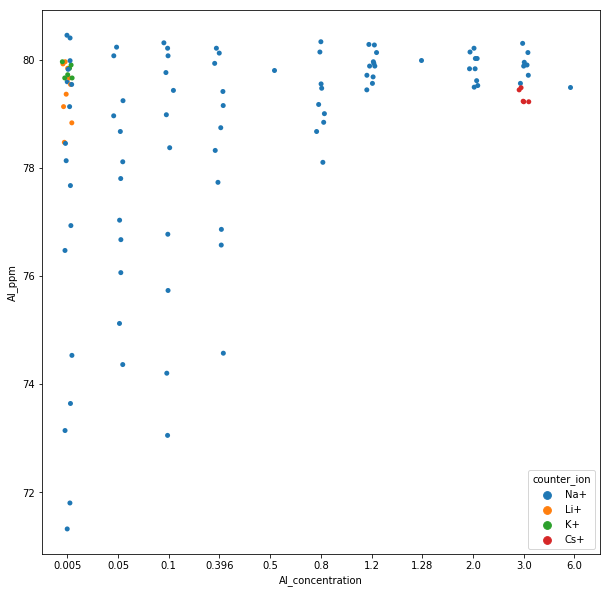

In [24]:
fig1, ax1 = plt.subplots(figsize=(10,10))

g = sns.stripplot(
    x="Al_concentration",
    y="Al_ppm",
    hue="counter_ion",
    data=AlNMRData,
    jitter=True,
    ax=ax1,
)

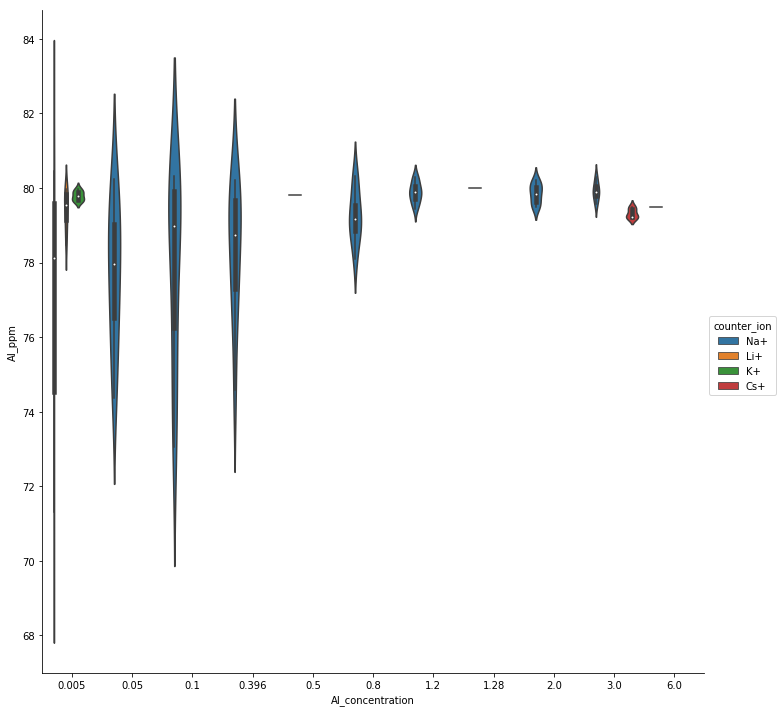

In [40]:
g = sns.factorplot(
    x="Al_concentration",
    y="Al_ppm",
    size=10,
    hue="counter_ion",
    data=AlNMRData,
    kind="violin"
)

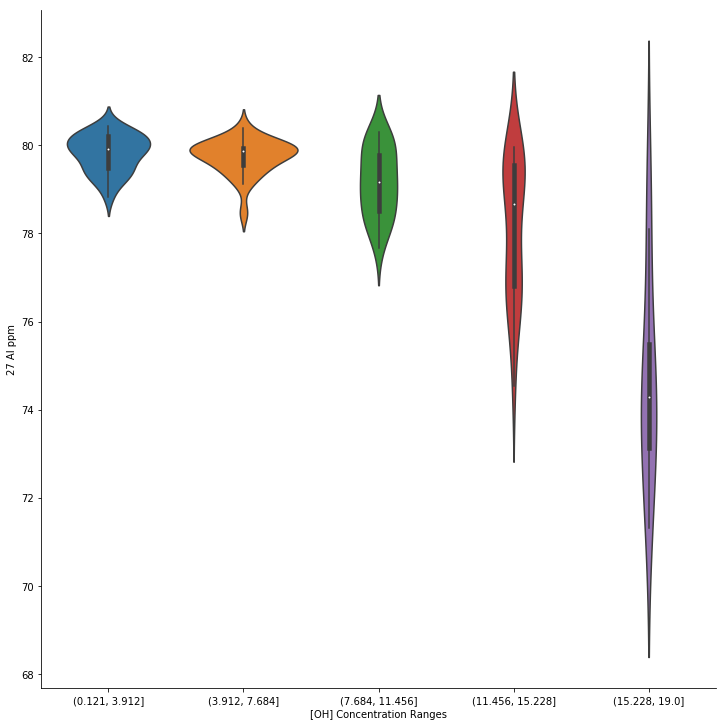

In [41]:
cut = pd.cut(AlNMRData.OH_concentration, 5)

boxdf = AlNMRData.groupby(cut) \
    .apply(lambda AlNMRData: AlNMRData.Al_ppm.reset_index(drop=True)) \
    .unstack(0)

OH_conc = sns.factorplot(
    data=boxdf,
    size=10,
    kind="violin"
)

OH_conc.set_axis_labels("[OH] Concentration Ranges", "27 Al ppm")

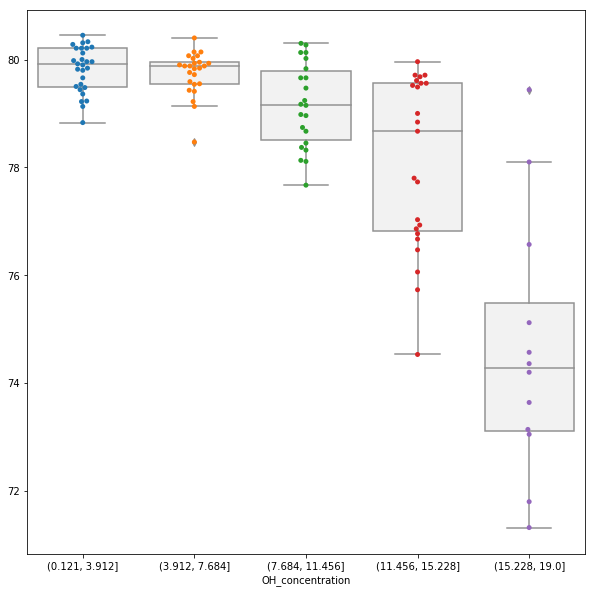

In [42]:
cut = pd.cut(AlNMRData.OH_concentration, 5)

boxdf = AlNMRData.groupby(cut) \
    .apply(lambda AlNMRData: AlNMRData.Al_ppm.reset_index(drop=True)) \
    .unstack(0)


fig1, ax1 = plt.subplots(figsize=(10,10))

g = sns.swarmplot(
#     x="Al_concentration",
#     y="Al_ppm",
#     hue="counter_ion",
    data=boxdf,
    ax=ax1,
)

g = sns.boxplot(
    color="0.95",
    ax=ax1,
    data=boxdf)


OH_conc.set_axis_labels("[OH] Concentration Ranges", "27 Al ppm")

In [43]:
boxdf

OH_concentration,"(0.121, 3.912]","(3.912, 7.684]","(7.684, 11.456]","(11.456, 15.228]","(15.228, 19.0]"
0,80.45,80.40,78.13,76.93,73.64
1,80.23,79.59,79.24,77.80,71.80
2,80.31,80.07,78.67,77.03,75.12
3,80.21,80.07,78.96,76.67,74.36
4,80.21,79.76,78.11,76.06,74.20
5,80.12,79.43,78.98,76.77,73.05
6,80.33,79.93,78.37,75.73,76.57
7,80.28,79.41,79.15,77.73,74.57
8,80.21,80.14,78.74,76.86,78.10
9,79.96,79.55,78.32,78.84,79.44


In [44]:
# cut = pd.cut(df.value, [0, 20, 40, 60, 80, 100])

# boxdf = df.groupby(cut) \
#     .apply(lambda df: df.combined_delta.reset_index(drop=True)) \
#     .unstack(0)

# sns.boxplot(data=boxdf);

In [45]:
# AlNMRData.boxplot(
#     by="OH_concentration",
#     column="Al_ppm",
#     figsize=(10,10)
# )

### Creating a simple example plot

This is for the NWTCC conference...

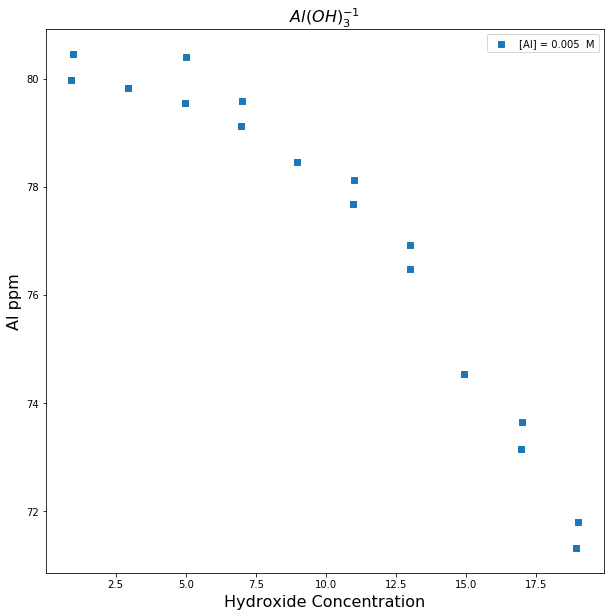

In [46]:
small_data = AlNMRData[(AlNMRData.Al_concentration == 0.005) & (AlNMRData.counter_ion == 'Na+')]

fig1, ax1 = plt.subplots(figsize=(10,10))
plt.scatter(
    x=small_data.OH_concentration,
    y=small_data.Al_ppm,
    label="[Al] = " + str(small_data.Al_concentration[0]) + "  M",
    marker=",",
)

plt.ylabel("Al ppm", fontsize=16)
plt.xlabel("Hydroxide Concentration", fontsize=16)
# plt.rc('text', usetex=True)
plt.title(r"$Al(OH)_3^{-1}$ ", fontsize=16)
ax1.legend()

plt.show()

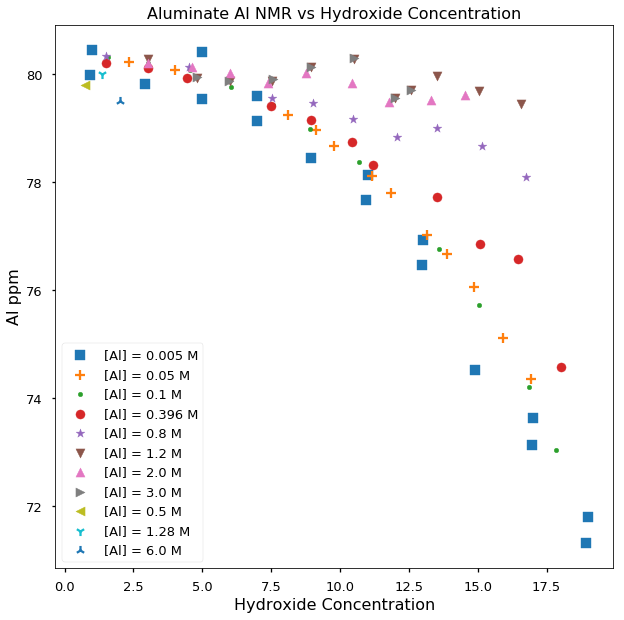

In [68]:
fig1, ax1 = plt.subplots(figsize=(10,10))
# ax1.set(xscale="log")

small_data = AlNMRData[(AlNMRData.counter_ion == 'Na+')]

unique_Al_conc = small_data.Al_concentration.unique()

for ii, xx in enumerate(unique_Al_conc):

    # Pull out the current bin of Al concentrations.
    curr_Al = small_data[(small_data.Al_concentration == xx)]
    
    # Create the Scatter plot with the selected subset of data
    plt.scatter(
        x=curr_Al.OH_concentration,
        y=curr_Al.Al_ppm,
        label="[Al] = " + str(unique_Al_conc[ii]) + " M",  # xx,
        marker = marker_list[ii],
    )
    
plt.ylabel("Al ppm", fontsize=16)
plt.xlabel("Hydroxide Concentration", fontsize=16)
# plt.rc('text', usetex=True)
plt.title("Aluminate Al NMR vs Hydroxide Concentration", fontsize=16)
ax1.legend()
plt.show()

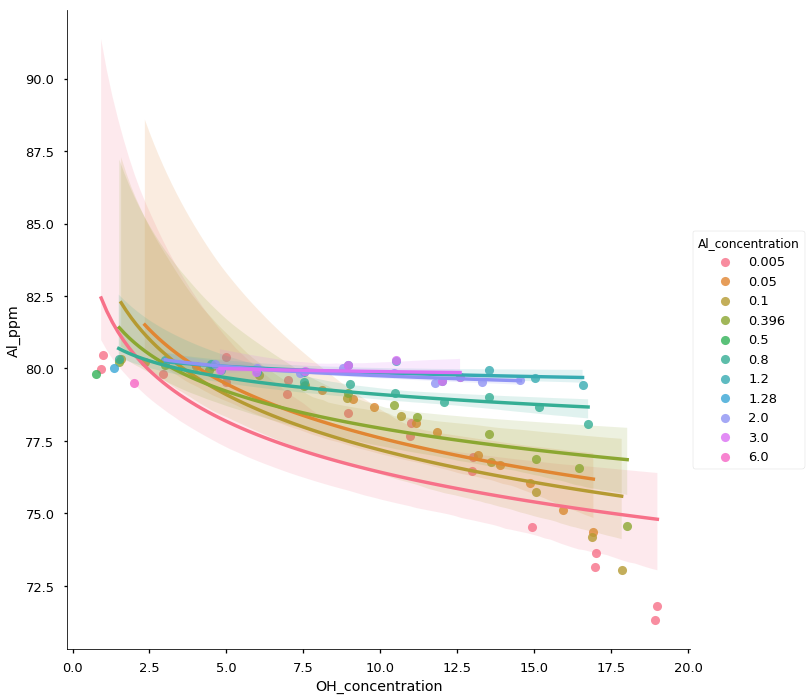

In [48]:
sns.set_context("talk")
g1 = sns.lmplot(
    x="OH_concentration",
    y="Al_ppm",
    data=small_data,
    hue="Al_concentration",
    fit_reg=True,
    truncate=True,
    size=10,
    logx=True,
)

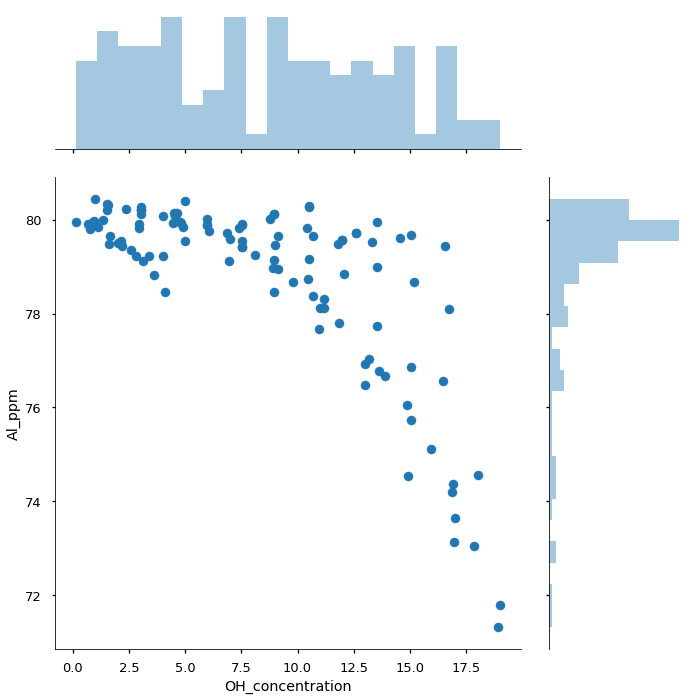

In [49]:
sns.jointplot(
    x="OH_concentration",
    y="Al_ppm",
    data=AlNMRData,
    stat_func=None,
    size=10,
    marginal_kws=dict(bins=20),   #, rug=True),
    ratio=3
)

In [50]:
small_data = AlNMRData[
    (AlNMRData.counter_ion == 'Na+') #& (AlNMRData.Al_concentration == 0.005)
]

YY = small_data['Al_ppm']
XX = small_data['OH_concentration']

model = sm.OLS(YY, XX)
results = model.fit()

# print(results.summary())

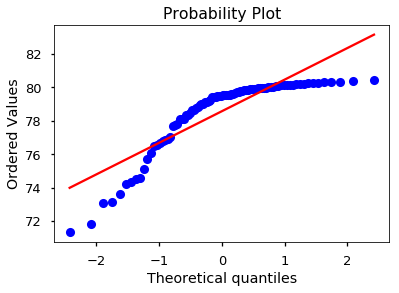

In [51]:
res = stats.probplot(YY, plot=plt)
plt.show()

In [52]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

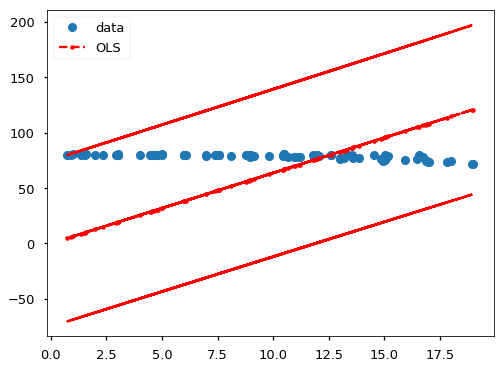

In [53]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(XX, YY, 'o', label="data")
# ax.plot(XX, y_true, 'b-', label="True")
ax.plot(XX, results.fittedvalues, 'r--.', label="OLS")
ax.plot(XX, iv_u, 'r--')
ax.plot(XX, iv_l, 'r--')
ax.legend(loc='best');

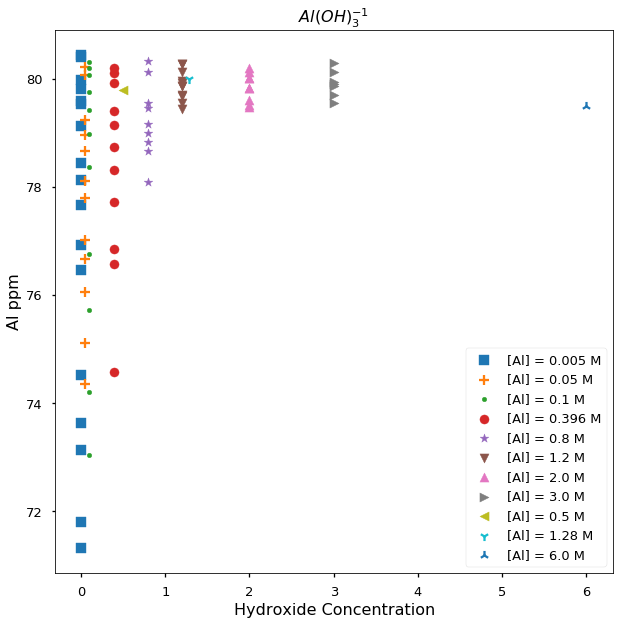

In [54]:
fig1, ax1 = plt.subplots(figsize=(10,10))
# ax1.set(xscale="log")

small_data = AlNMRData[(AlNMRData.counter_ion == 'Na+')]

unique_Al_conc = small_data.Al_concentration.unique()

for ii, xx in enumerate(unique_Al_conc):

    # Pull out the current bin of Al concentrations.
    curr_Al = small_data[(small_data.Al_concentration == xx)]
    
    # Create the Scatter plot with the selected subset of data
    plt.scatter(
        x=curr_Al.Al_concentration,
        y=curr_Al.Al_ppm,
        label="[Al] = " + str(unique_Al_conc[ii]) + " M",  # xx,
        marker = marker_list[ii],
    )
    
plt.ylabel("Al ppm", fontsize=16)
plt.xlabel("Hydroxide Concentration", fontsize=16)
# plt.rc('text', usetex=True)
plt.title(r"$Al(OH)_3^{-1}$ ", fontsize=16)
ax1.legend()
plt.show()

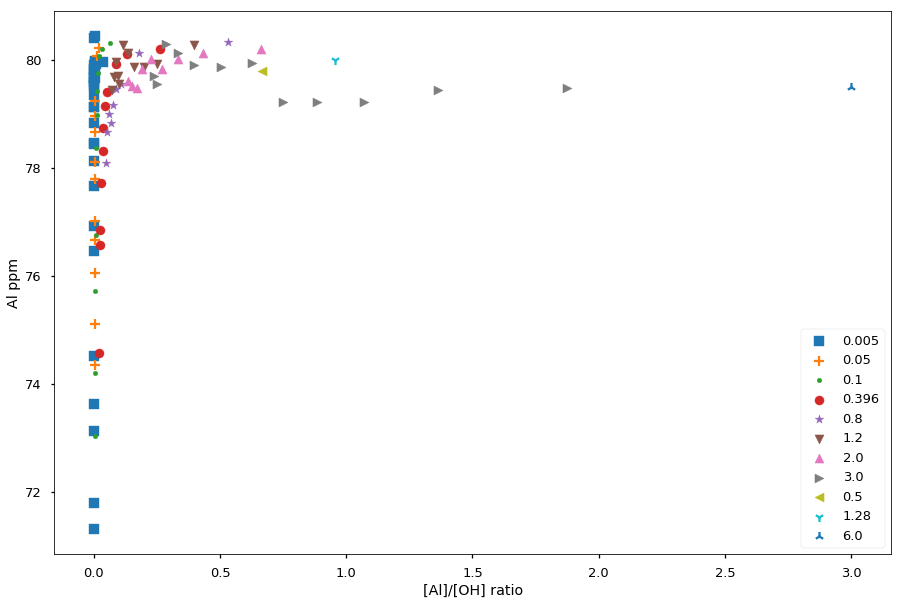

In [55]:
fig1, ax1 = plt.subplots(figsize=(15,10))
# ax1.set(xscale="log")

unique_Al_conc = AlNMRData.Al_concentration.unique()

for ii, xx in enumerate(unique_Al_conc):

    # Pull out the current bin of Al concentrations.
    curr_Al = AlNMRData[(AlNMRData.Al_concentration == xx)]
    
    # Create the Scatter plot with the selected subset of data
    plt.scatter(
        x=curr_Al.Al_OH_ratio,
        y=curr_Al.Al_ppm,
        label=xx,
        marker = marker_list[ii],
    )
    
    # Calculate
#     slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
ax1.legend()
plt.ylabel("Al ppm")
plt.xlabel("[Al]/[OH] ratio")
plt.show()

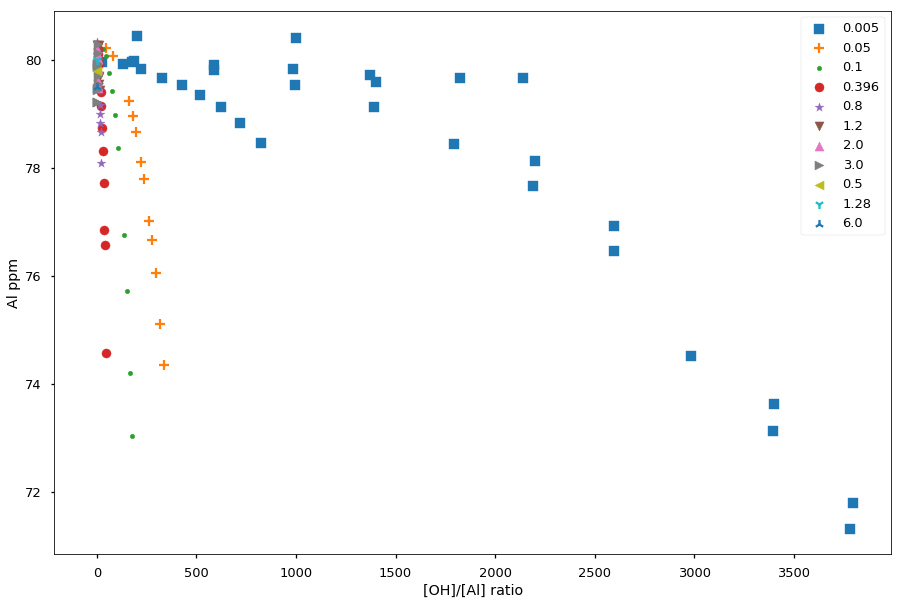

In [56]:
fig1, ax1 = plt.subplots(figsize=(15,10))
unique_Al_conc = AlNMRData.Al_concentration.unique()

for ii, xx in enumerate(unique_Al_conc):

    # Pull out the current bin of Al concentrations.
    curr_Al = AlNMRData[(AlNMRData.Al_concentration == xx)]
    
    # Create the Scatter plot with the selected subset of data
    plt.scatter(
        x=curr_Al.OH_Al_ratio,
        y=curr_Al.Al_ppm,
        label=xx,
        marker = marker_list[ii],
    )
    

plt.ylabel("Al ppm")
plt.xlabel("[OH]/[Al] ratio")
ax1.legend()
plt.show()

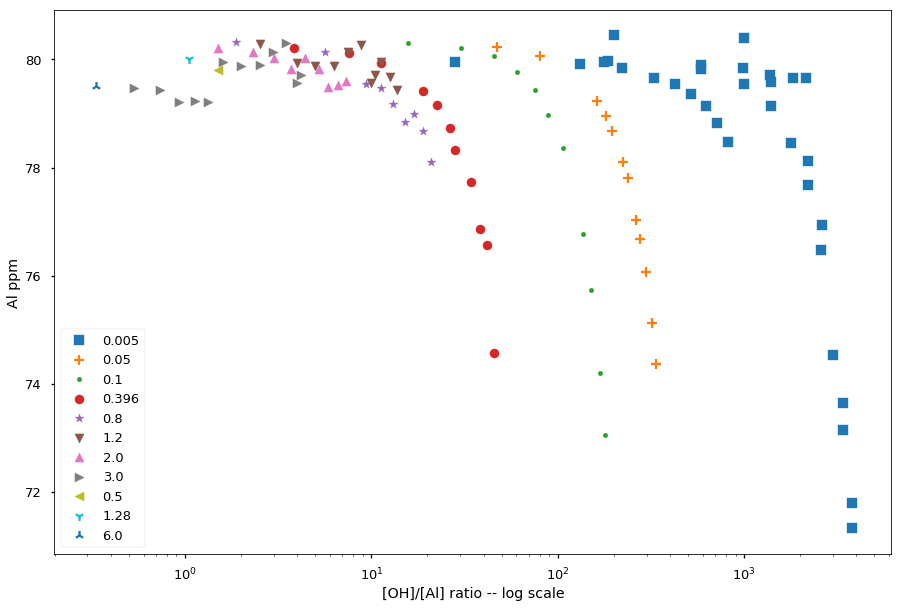

In [57]:
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.set(xscale="log")

unique_Al_conc = AlNMRData.Al_concentration.unique()

for ii, xx in enumerate(unique_Al_conc):

    # Pull out the current bin of Al concentrations.
    curr_Al = AlNMRData[(AlNMRData.Al_concentration == xx)]
    
    # Create the Scatter plot with the selected subset of data
    plt.scatter(
        x=curr_Al.OH_Al_ratio,
        y=curr_Al.Al_ppm,
        label=xx,
        marker = marker_list[ii],
    )
    
plt.ylabel("Al ppm")
plt.xlabel("[OH]/[Al] ratio -- log scale")
ax1.legend()
plt.show()

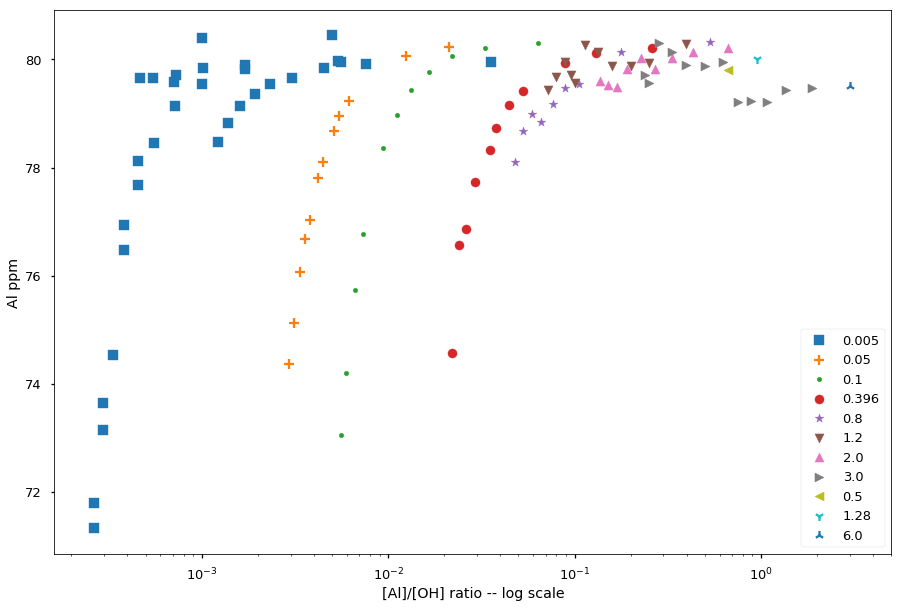

In [58]:
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.set(xscale="log")

unique_Al_conc = AlNMRData.Al_concentration.unique()

for ii, xx in enumerate(unique_Al_conc):

    # Pull out the current bin of Al concentrations.
    curr_Al = AlNMRData[(AlNMRData.Al_concentration == xx)]
    
    # Create the Scatter plot with the selected subset of data
    plt.scatter(
        x=curr_Al.Al_OH_ratio,
        y=curr_Al.Al_ppm,
        label=xx,
        marker = marker_list[ii],
    )
    
plt.ylabel("Al ppm")
plt.xlabel("[Al]/[OH] ratio -- log scale")
ax1.legend()
plt.show()

### Interesting pattern observed above. Explore further.

#### Plot linear regressions by aluminum concentration
http://www.statsmodels.org/dev/rlm.html

/home/tylerbiggs/Envs/python36/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


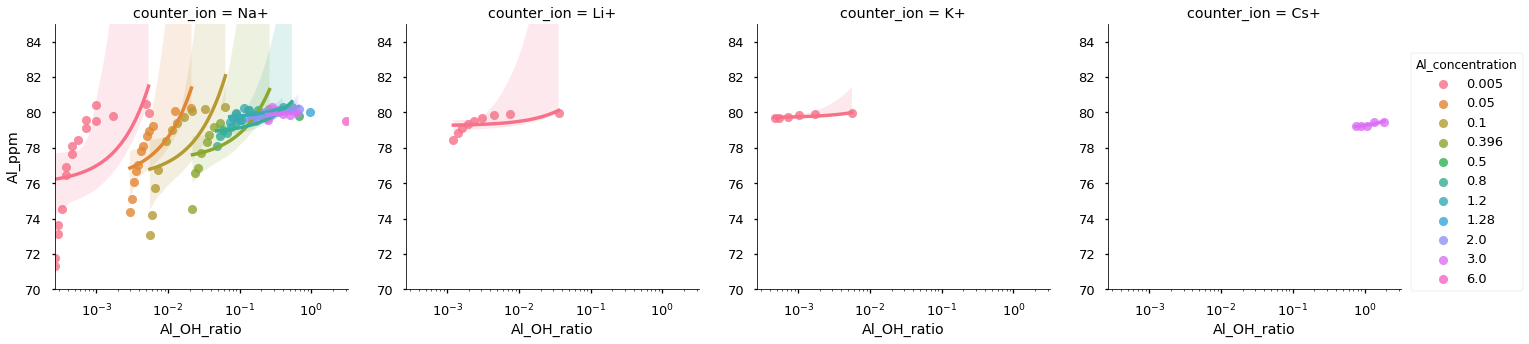

In [59]:
g1 = sns.lmplot(
    x="Al_OH_ratio",
    y="Al_ppm",
    hue="Al_concentration",
    data=AlNMRData,
    truncate=True,
    col="counter_ion",
)
g1.set(xscale="log")
# http://www.statsmodels.org/dev/rlm.html
axes = g1.axes
axes[0,0].set_ylim(70,85)
axes[0,0].set_xlim(0,)
plt.show()

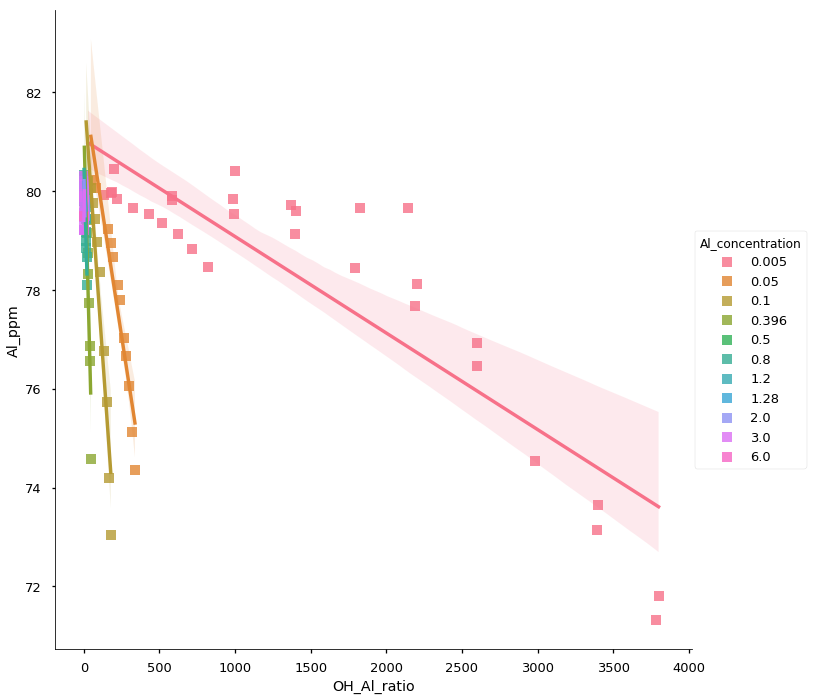

In [60]:
g1 = sns.lmplot(
    x="OH_Al_ratio",
    y="Al_ppm",
    hue="Al_concentration",
    data=AlNMRData,
    truncate=True,
    markers=next(marker),
    size=10
#     col="counter_ion",
)
# g1.set(xscale="log")
# http://www.statsmodels.org/dev/rlm.html
# axes = g1.axes
# axes[0,0].set_ylim(70,85)
# axes[0,0].set_xlim(0,)
plt.show()

/home/tylerbiggs/Envs/python36/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


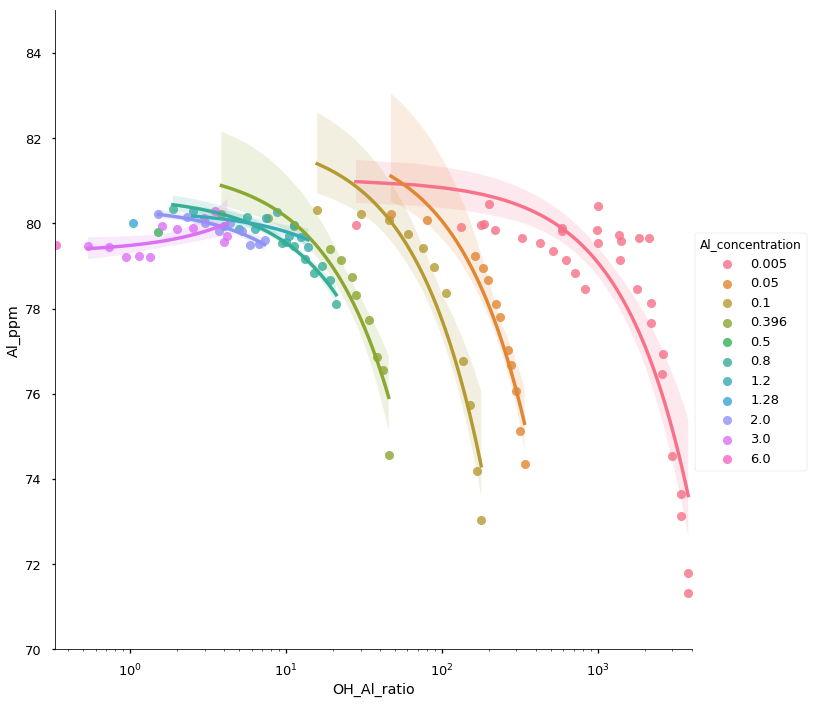

In [61]:
g1 = sns.lmplot(
    x="OH_Al_ratio",
    y="Al_ppm",
    hue="Al_concentration",
    data=AlNMRData,
    truncate=True,
    size=10
#     col="counter_ion",
)
g1.set(xscale="log")
axes = g1.axes
axes[0,0].set_ylim(70,85)
axes[0,0].set_xlim(0,)
plt.show()

#### locally weighted linear regression
A good fit, but I don't see how this is usefull.

/home/tylerbiggs/Envs/python36/lib/python3.6/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/home/tylerbiggs/Envs/python36/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


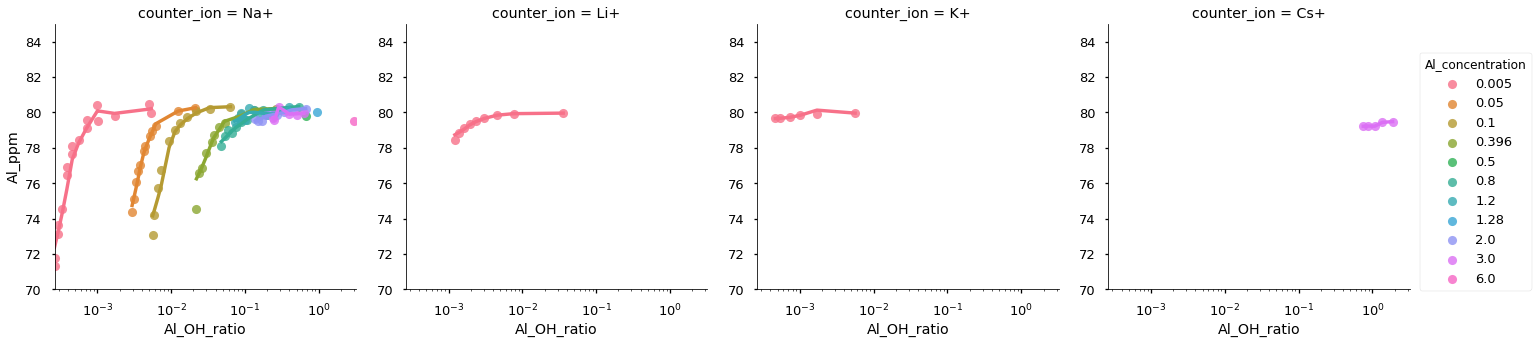

In [62]:
g1 = sns.lmplot(
    x="Al_OH_ratio",
    y="Al_ppm",
    hue="Al_concentration",
    data=AlNMRData,
    truncate=True,
    col="counter_ion",
    lowess=True
)
g1.set(xscale="log")

axes = g1.axes
axes[0,0].set_ylim(70,85)
axes[0,0].set_xlim(0,)
plt.show()

#### Check different orders of fitting

I tried up to 5, no good fits emereged.

In [63]:
# g1 = sns.lmplot(
#     x="Al_OH_ratio",
#     y="Al_ppm",
#     hue="Al_concentration",
#     data=AlNMRData,
#     truncate=True,
#     col="counter_ion",
#     order=2,
# )
# g1.set(xscale="log")

# axes = g1.axes
# axes[0,0].set_ylim(70,85)
# axes[0,0].set_xlim(0,)
# plt.show()

#### Robust Regression

Warning!!! Long run time or crahes -- depending on system

In [64]:
# g1 = sns.lmplot(
#     x="Al_OH_ratio",
#     y="Al_ppm",
#     hue="Al_concentration",
#     data=AlNMRData,
#     truncate=True,
#     col="counter_ion",
#     robust=True
# )
# g1.set(xscale="log")

# axes = g1.axes
# axes[0,0].set_ylim(70,85)
# axes[0,0].set_xlim(0,)
# plt.show()

#### y ~ log(x)
Might be a little better. Still does not depict the data.

/home/tylerbiggs/Envs/python36/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


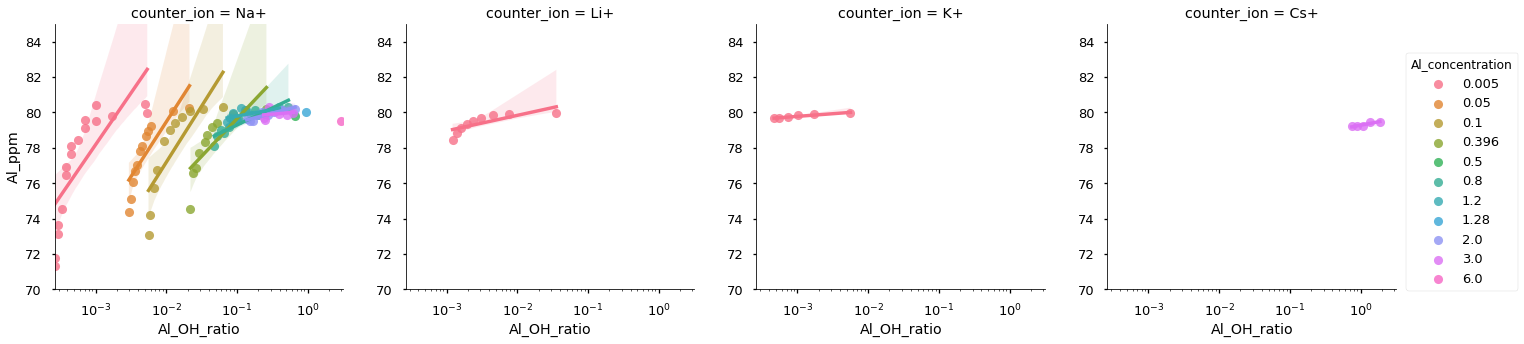

In [65]:
g1 = sns.lmplot(
    x="Al_OH_ratio",
    y="Al_ppm",
    hue="Al_concentration",
    data=AlNMRData,
    truncate=True,
    col="counter_ion",
    logx=True
)
g1.set(xscale="log")

axes = g1.axes
axes[0,0].set_ylim(70,85)
axes[0,0].set_xlim(0,)
plt.show()

Some observartions:

+ All concentrations trend towards the 80 pmm valueas the

### Try to run a linear regression over the entire dataset

In [66]:
# f, ax = plt.subplots(figsize=(15, 8))

# ax.set(xscale="log")

# plt.scatter(
#     x=AlNMRData.Al_OH_ratio,
#     y=AlNMRData.Al_ppm,
#     c=cm(AlNMRData.Al_concentration),
#     s=AlNMRData.OH_concentration*5
# )

# # run a simple linear regression
# slope, intercept, r_value, p_value, std_err = stats.linregress(AlNMRData.Al_OH_ratio, AlNMRData.Al_ppm)

# plt.plot(AlNMRData.Al_OH_ratio, intercept + slope*AlNMRData.Al_OH_ratio, 'r', label='fitted line')

# # legend = ax.get_legend()
# ax.legend()


# # plt.colorbar()
# plt.show()

### Try on a subset of data

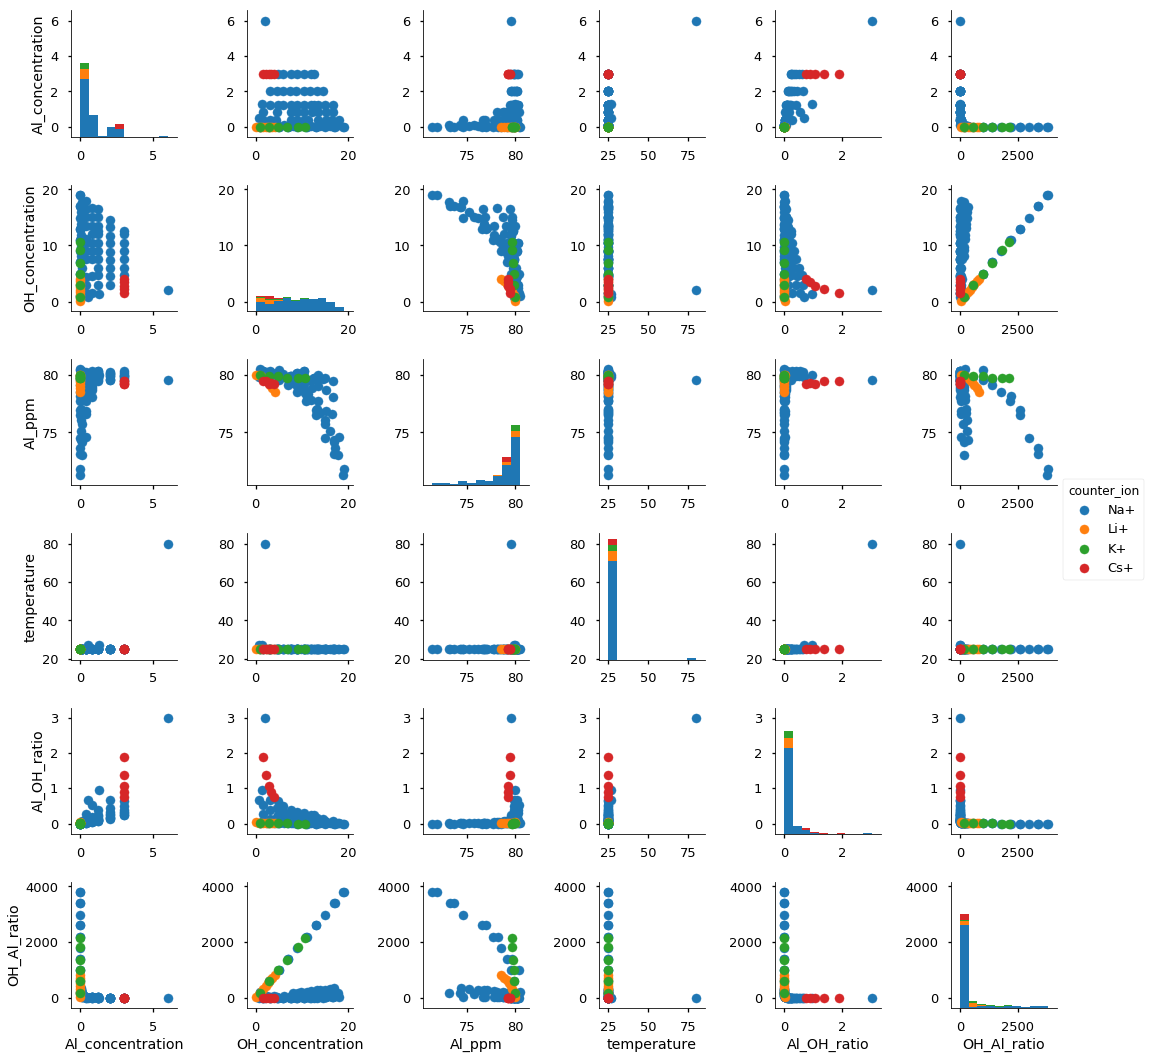

In [67]:
g = sns.PairGrid(AlNMRData, hue="counter_ion")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

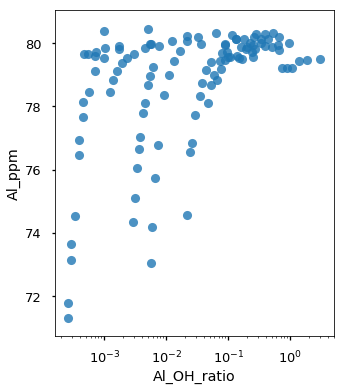

In [30]:
f, ax = plt.subplots(figsize=(5, 6))
ax.set(xscale="log")

sns.regplot(
    x="Al_OH_ratio",
    y="Al_ppm",
    data=AlNMRData,
    ax=ax,
#     hue="Al_concentration",
    fit_reg=False
)

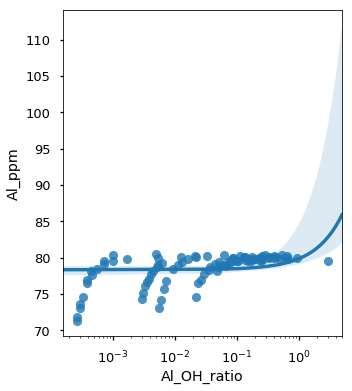

In [31]:
# Setup the figure and axis so that we can control them via the matplotlib interface.
f, ax = plt.subplots(figsize=(5, 6))
ax.set(xscale="log")


g2 = sns.regplot(
    x="Al_OH_ratio",
    y="Al_ppm",
#     color="Al_concentration",
    ax=ax,
    data=AlNMRData[(AlNMRData.counter_ion == "Na+")],
)

In [32]:
list(AlNMRData)

['Al_concentration',
 'OH_concentration',
 'Al_ppm',
 'counter_ion',
 'temperature',
 'Al_OH_ratio',
 'OH_Al_ratio']

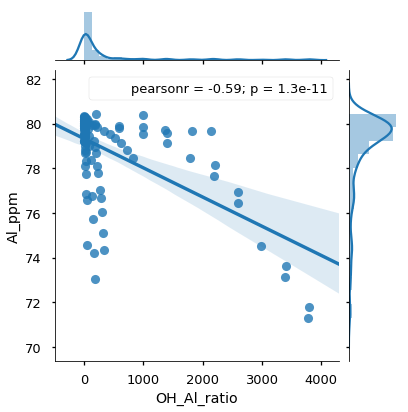

In [33]:
sns.jointplot(
    x="OH_Al_ratio",
    y="Al_ppm",
    data=AlNMRData,
    kind="reg",
)

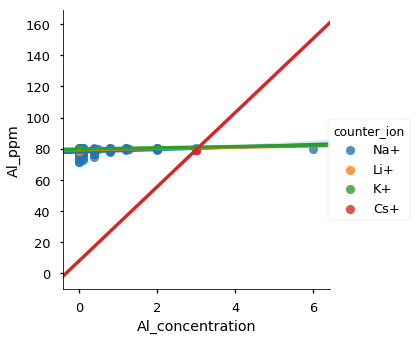

In [34]:
g1 = sns.lmplot(
    x="Al_concentration",
    y="Al_ppm",
    data=AlNMRData,
    hue="counter_ion"
)

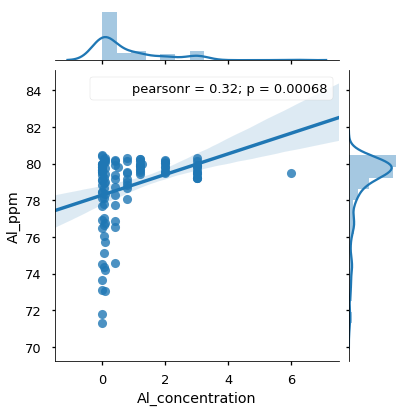

In [35]:
sns.jointplot(
    x="Al_concentration",
    y="Al_ppm",
    data=AlNMRData,
#     hue="counter_ion",
    kind="reg",
)

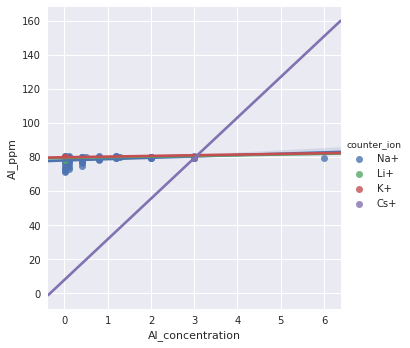

In [36]:
# sns.set(style="darkgrid", color_codes=True)

g1 = sns.lmplot(
    x="Al_concentration",
    y="Al_ppm",
    data=AlNMRData,
    hue="counter_ion"
)